### In this Notebook we will use **Clustering Analysis** to understand how Pages Duration vs Rattes can be grouped.
- We will start with building two function one to plot the Number of clusters vs WCSS and one to plot the scatter of the two columns hued by the clustering algorithm.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [55]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [56]:
def plot_within_cluster_sum_squares_vs_no_clusters(cols):
    """
    Plots the within-cluster sum of squares vs number of clusters using KMeans clustering algorithm.
    Args:
        cols: list of column names to be used for clustering
    """
    x = df[cols].values
    wcss = []
    max_clusters = 10  # Maximum number of clusters to try
    for i in range(1, max_clusters + 1):
        km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0, algorithm='elkan', tol=0.001)
        km.fit(x)
        wcss.append(km.inertia_)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), wcss, '-o')
    plt.xlabel('Number of clusters', fontsize=14)
    plt.ylabel('Within-cluster sum of squares', fontsize=14)
    plt.title('Elbow Method', fontsize=16)
    plt.xticks(range(1, max_clusters + 1))
    plt.grid(True)
    plt.savefig(f'figs/elbow method for {cols[0]} and {cols[1]}.png', format='png')
    plt.show()


In [57]:
from matplotlib.colors import ListedColormap

def scatter_clustered_cols(cols, n_clusters=2):
    """
    Plot a scatter plot of two columns from a DataFrame, with the points colored by their KMeans cluster assignment.

    Parameters:
        cols (list of str): The names of the two columns to plot.
        n_clusters (int): The number of clusters to use in the KMeans algorithm. Default is 2.

    Raises:
        ValueError: If the input DataFrame does not contain the specified columns.

    Returns:
        None
    """
    if not all(col in df.columns for col in cols):
        raise ValueError("Input DataFrame does not contain specified columns")
    
    x = df[cols].values

    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

    y_means = km.fit_predict(x)
    plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100, c='pink', label='Un-interested Customers')
    plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100, c='yellow', label='Target Customers')
    plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s=50, c='blue' , label='centeroid')

    plt.title(f'{cols[0]} vs {cols[1]}', fontsize=20)
    plt.grid()
    plt.xlabel(f'{cols[0]}')
    plt.ylabel(f'{cols[1]}')
    plt.legend(loc='best')
    plt.savefig(f'figs/scatter of {cols[0]} and {cols[1]} hued by the clustering algorithm.png', format='png')
    plt.show()
    print(km.cluster_centers_)


- Administrative_Duration vs Rates (BouceRates, ExitRates), Hint(there are some outliers in the Administrative_Duration Column)
    - the optimal number of clusters = 2
    - our target customers spend around 450-500 seconds on average on the Administrative page.
    - our target customers spend around 400-450 seconds on the Administrative page on average more than the other customers before exiting.

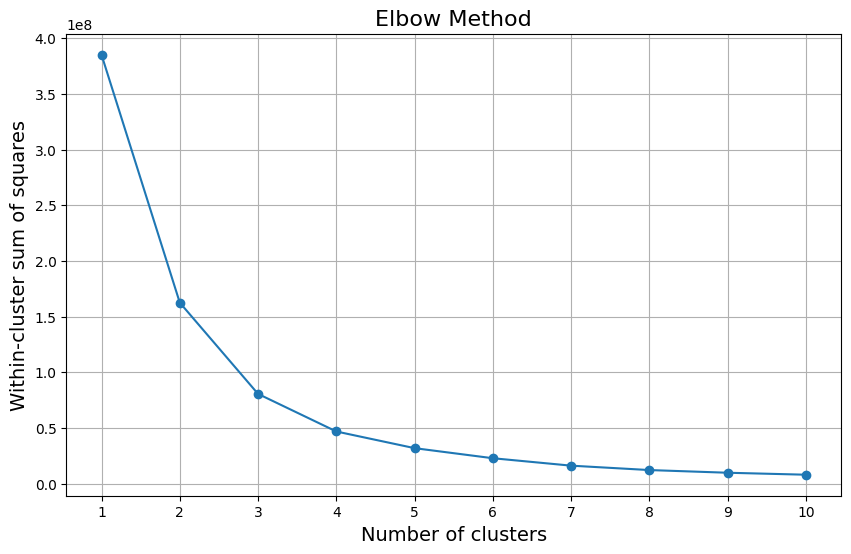

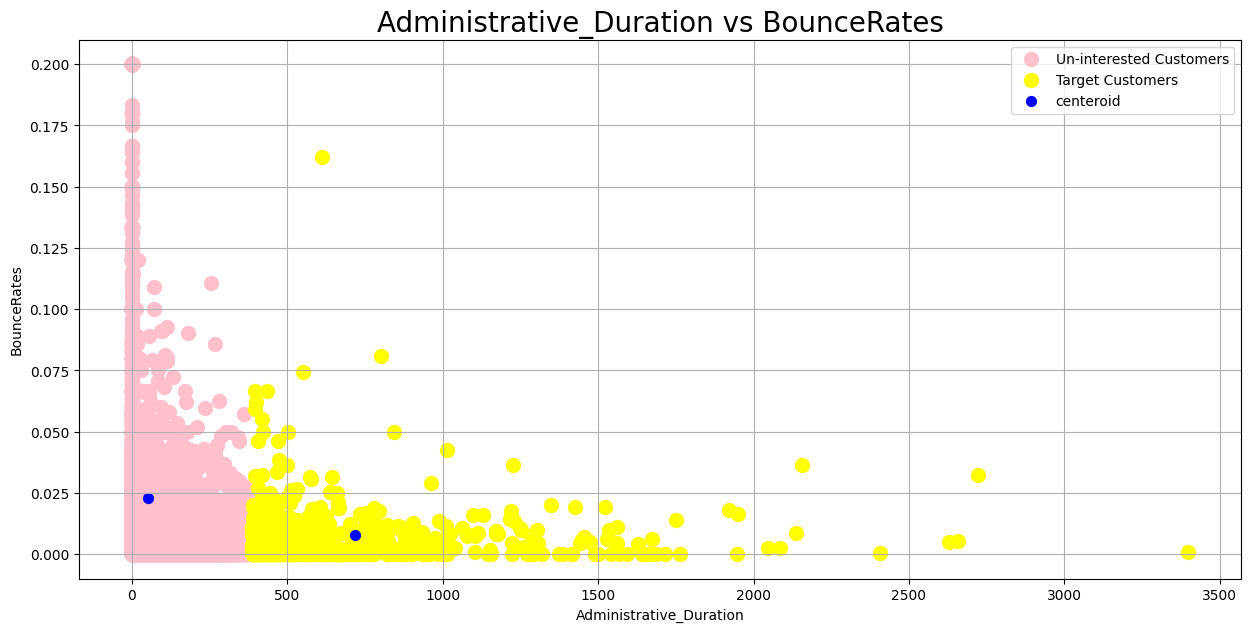

[[5.24199454e+01 2.28418466e-02]
 [7.16851713e+02 7.62316095e-03]]


In [58]:
cols = ['Administrative_Duration', 'BounceRates']
plot_within_cluster_sum_squares_vs_no_clusters(cols=cols)

n_clusters = 2
scatter_clustered_cols(cols=cols, n_clusters=n_clusters)

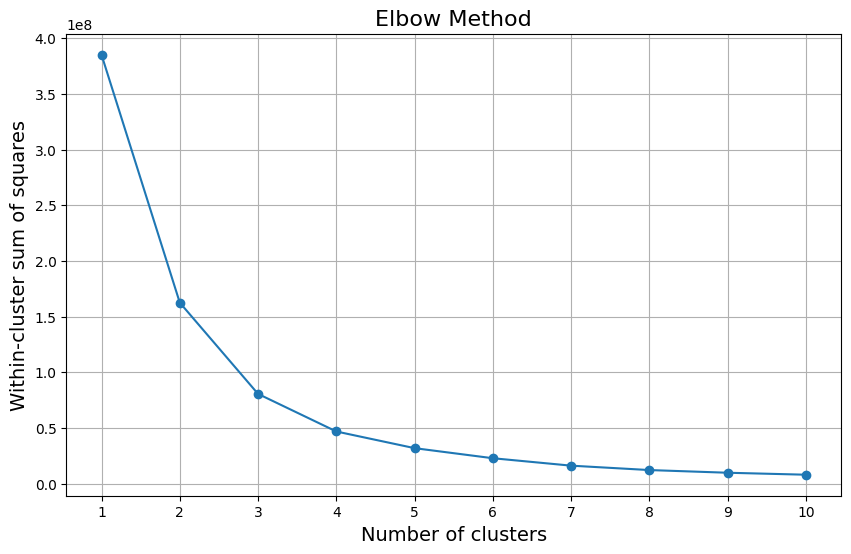

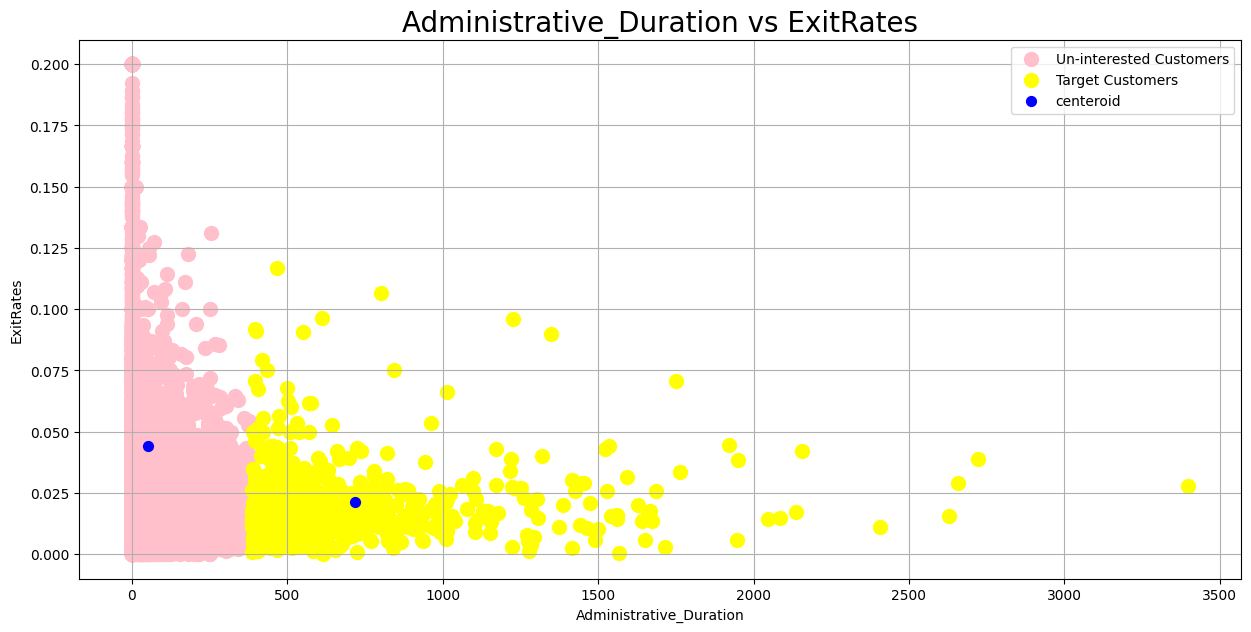

[[5.24199454e+01 4.40406796e-02]
 [7.16851713e+02 2.13955515e-02]]


In [59]:
cols = ['Administrative_Duration', 'ExitRates']
plot_within_cluster_sum_squares_vs_no_clusters(cols=cols)

n_clusters = 2
scatter_clustered_cols(cols=cols, n_clusters=n_clusters)

- Informational_Duration vs Rates (BouceRates, ExitRates), Hint(there are some outliers in the Informational_Duration Column)
    - the optimal number of clusters = 2
    - Our target customers spend around 850-900 seconds on average on the Information page.
    -  Our target customers spend around 150 seconds more on average than the other customers before exiting.

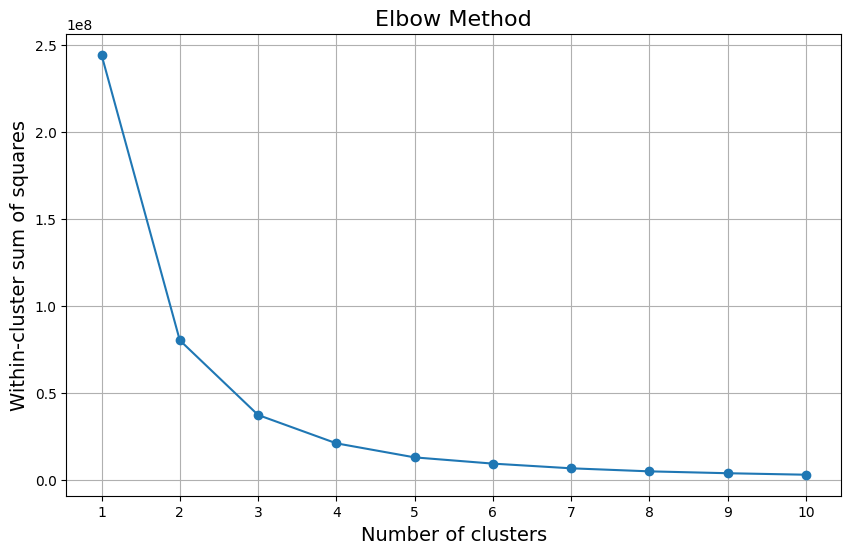

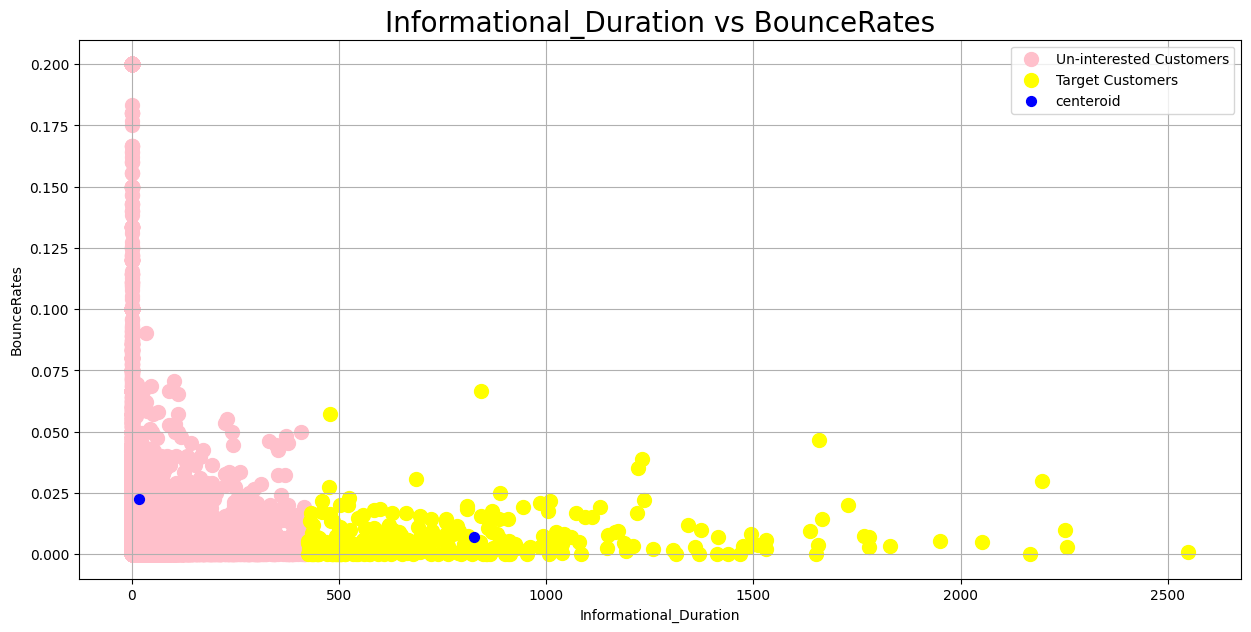

[[1.76829739e+01 2.25115179e-02]
 [8.26329841e+02 7.09239641e-03]]


In [60]:
cols = ['Informational_Duration', 'BounceRates']
plot_within_cluster_sum_squares_vs_no_clusters(cols=cols)

n_clusters = 2
scatter_clustered_cols(cols=cols, n_clusters=n_clusters)

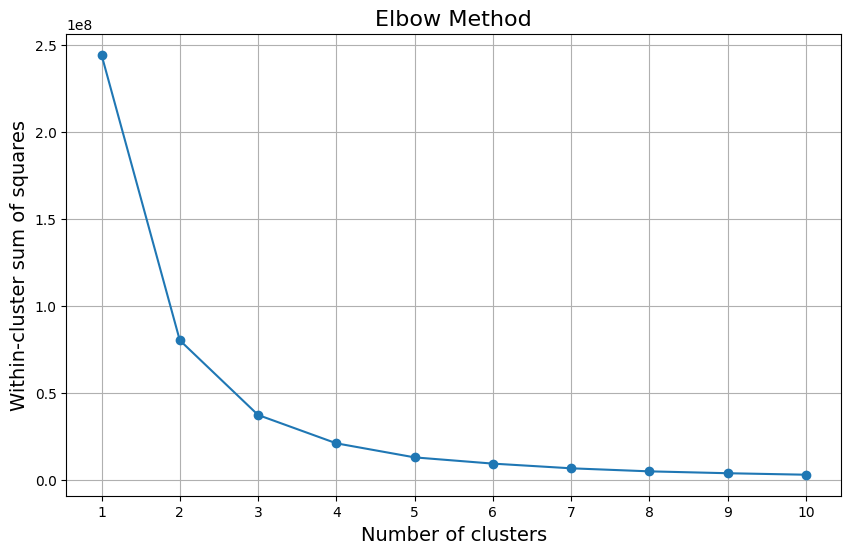

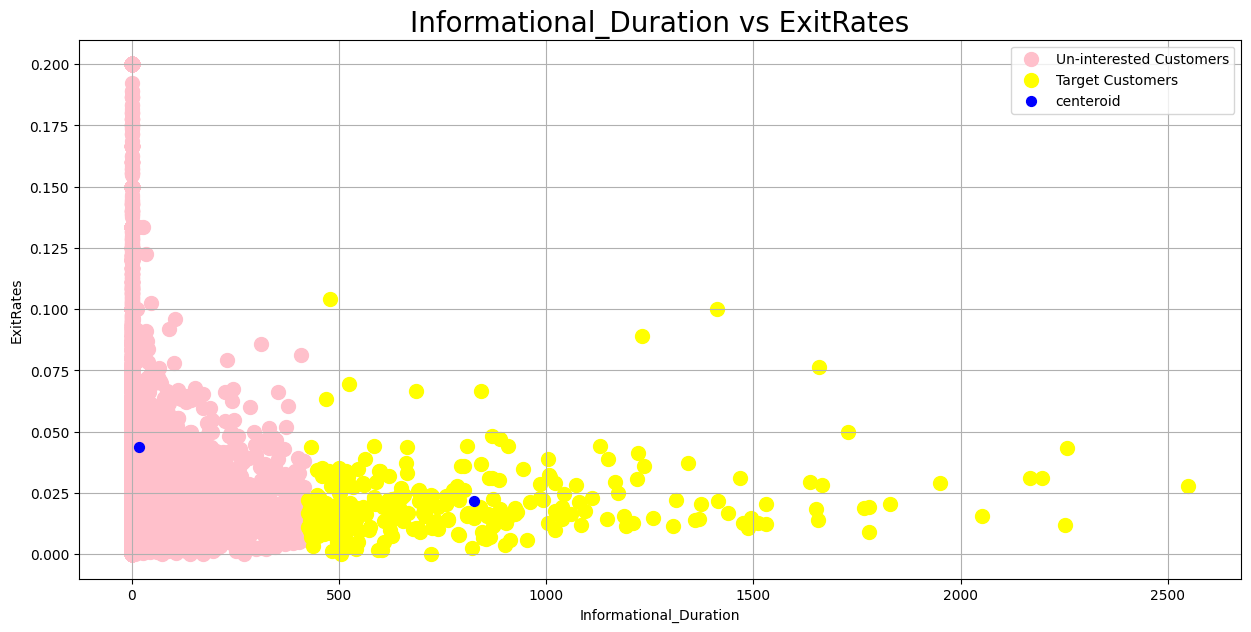

[[1.76829739e+01 4.35262773e-02]
 [8.26329841e+02 2.16848611e-02]]


In [61]:
cols = ['Informational_Duration', 'ExitRates']
plot_within_cluster_sum_squares_vs_no_clusters(cols=cols)

n_clusters = 2
scatter_clustered_cols(cols=cols, n_clusters=n_clusters)

- ProductRelated_Duration vs Rates (BouceRates, ExitRates), Hint(there are some outliers in the ProductRelated_Duration Column)
    - the optimal number of clusters = 2
    - Our target customers spend around 6100 seconds on average on the Information page.
    -  Our target customers spend around 6100 seconds more on average than the other customers before exiting.

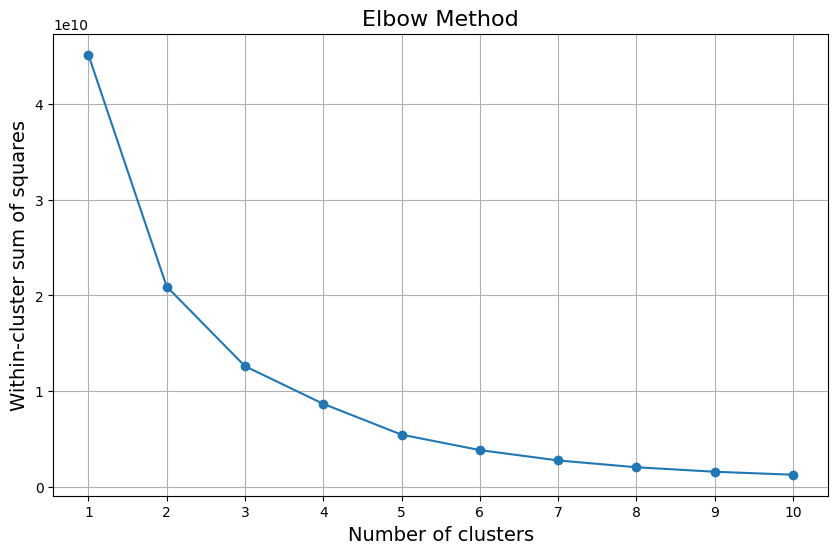

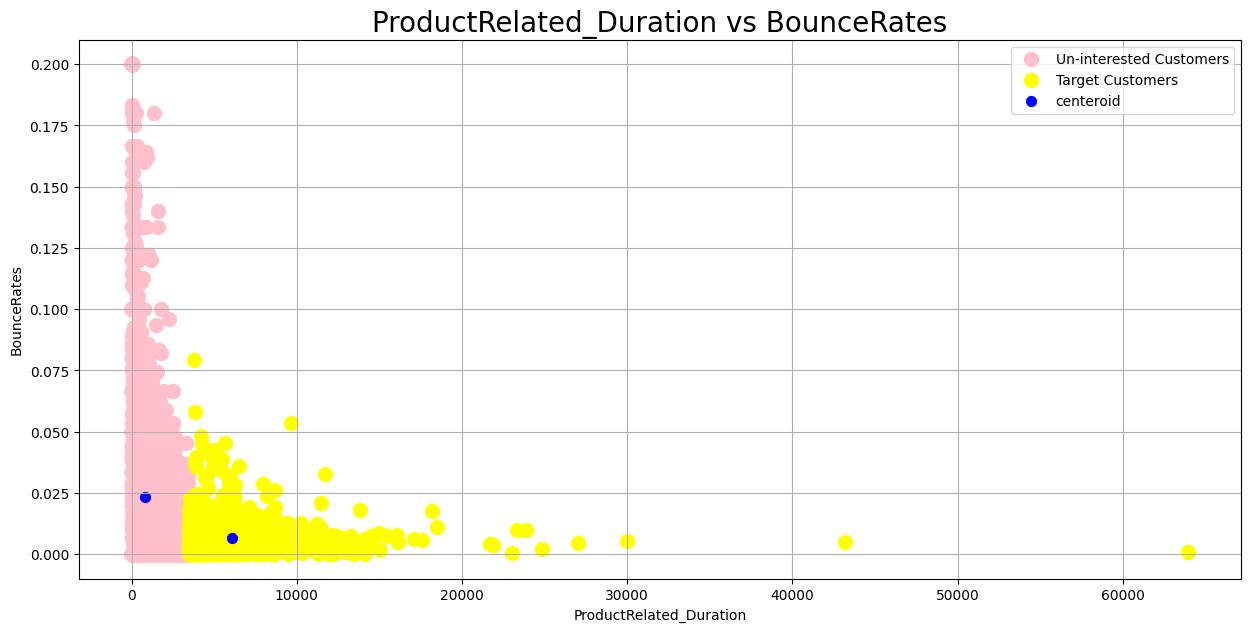

[[7.94670730e+02 2.34676386e-02]
 [6.10460699e+03 6.52871228e-03]]


In [62]:
cols = ['ProductRelated_Duration', 'BounceRates']
plot_within_cluster_sum_squares_vs_no_clusters(cols=cols)

n_clusters = 2
scatter_clustered_cols(cols=cols, n_clusters=n_clusters)

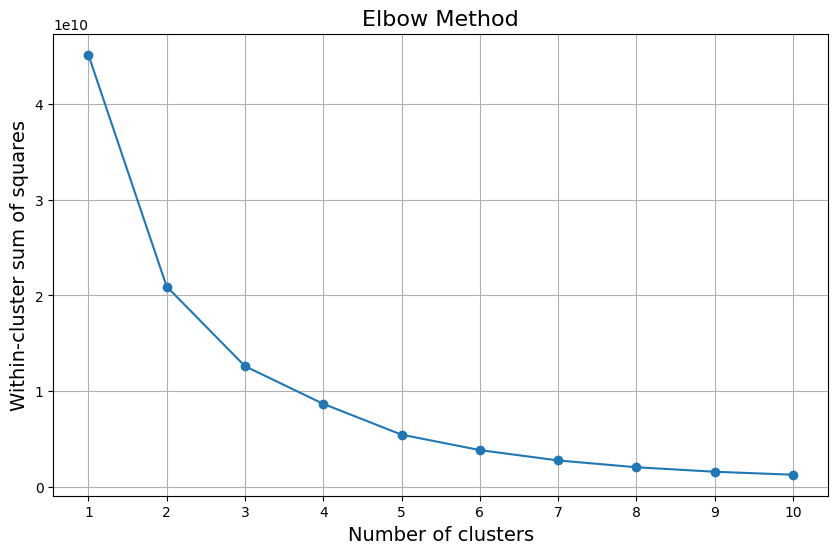

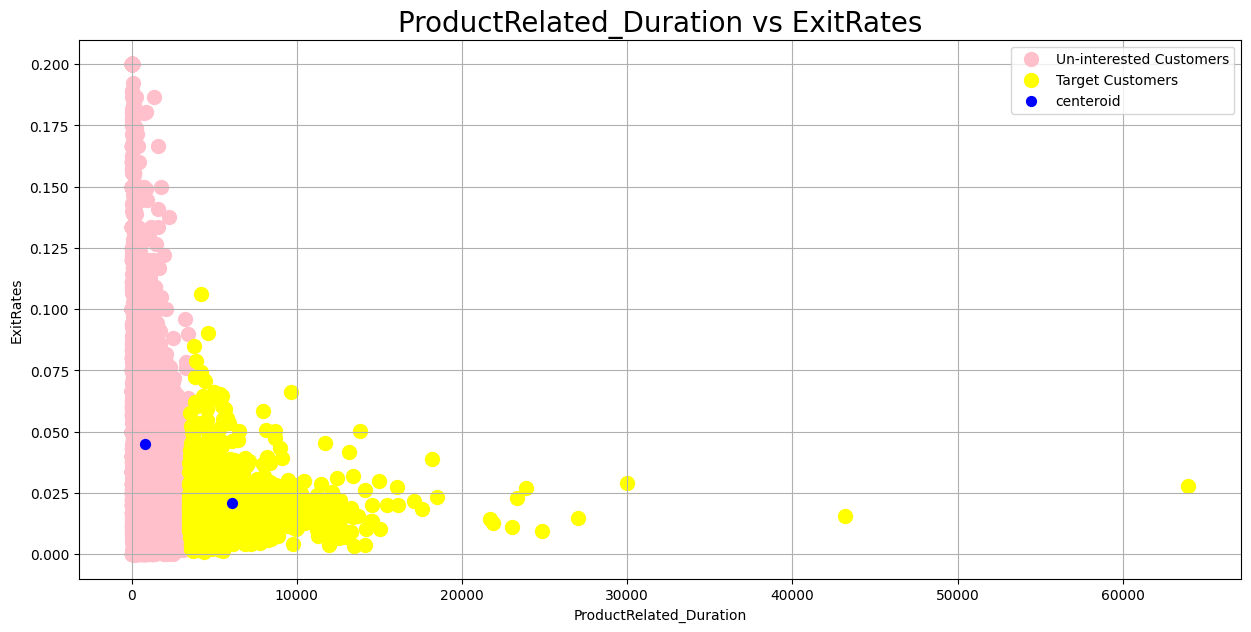

[[7.94670730e+02 4.48897441e-02]
 [6.10460699e+03 2.07746226e-02]]


In [63]:
cols = ['ProductRelated_Duration', 'ExitRates']
plot_within_cluster_sum_squares_vs_no_clusters(cols=cols)

n_clusters = 2
scatter_clustered_cols(cols=cols, n_clusters=n_clusters)